# Importing The Modules

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

# Importing The Boston House Price Dataset

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
df = pd.DataFrame(boston.data)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


CRIM per capita crime rate by town

ZN proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS proportion of non-retail business acres per town

CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX nitric oxides concentration (parts per 10 million)

RM average number of rooms per dwelling

AGE proportion of owner-occupied units built prior to 1940

DIS weighted distances to five Boston employment centres

RAD index of accessibility to radial highways

TAX full-value property-tax rate per 10,000usd

PTRATIO pupil-teacher ratio by town

B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT % lower status of the population

In [6]:
df['PRICE'] = boston.target

# Analysing the Data

In [7]:
df.shape

(506, 14)

In [8]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [9]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [11]:
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
PRICE      229
dtype: int64

In [12]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

So, there are no null values in our data

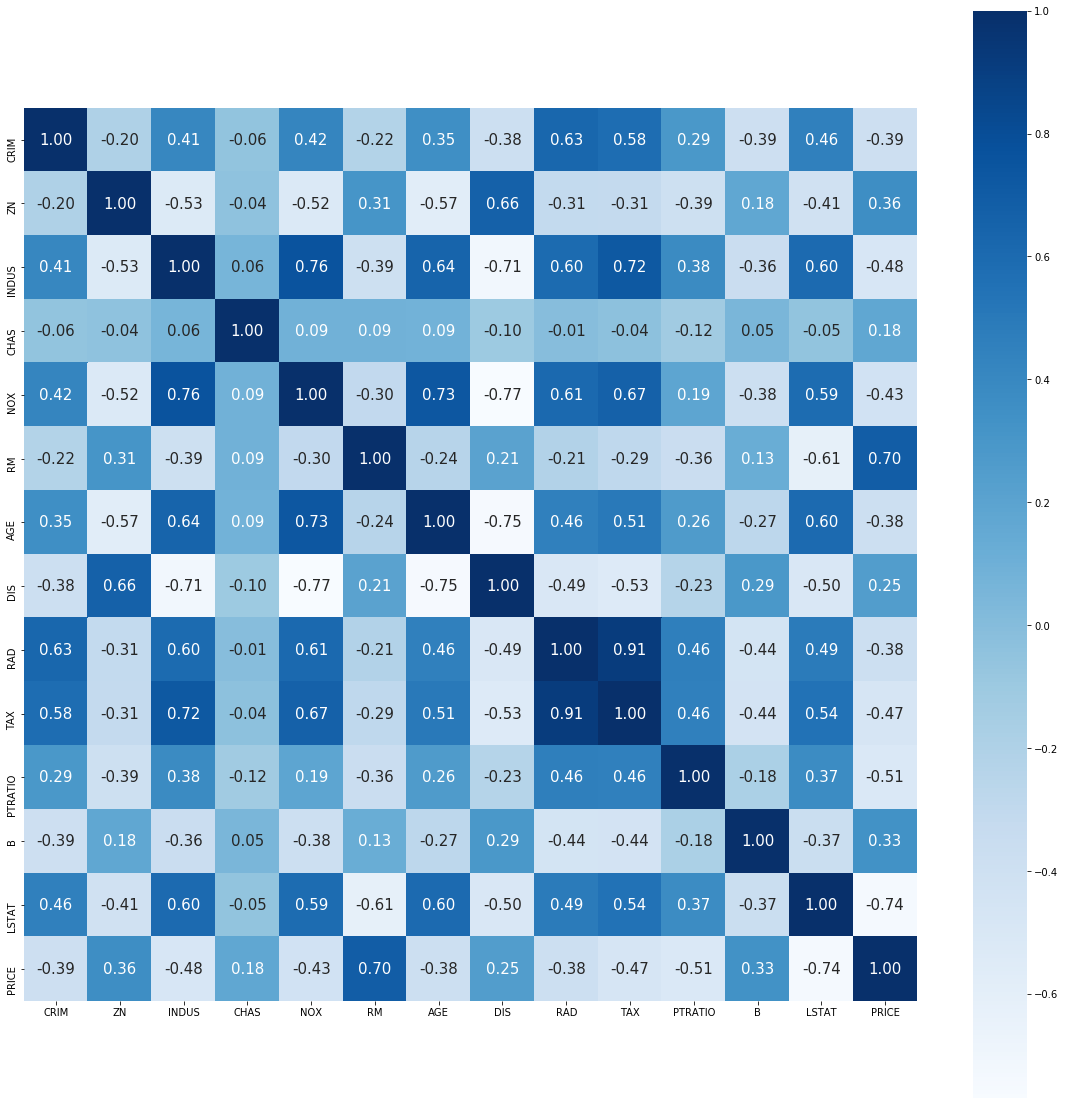

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cbar=True, square= True, fmt='.2f', annot=True, annot_kws={'size':15}, cmap='Blues')

# Converting into a numpy array

In [14]:
X = df.drop(['PRICE'], axis = 1)
y = df['PRICE']

In [15]:
X.shape

(506, 13)

In [16]:
y.shape

(506,)

# Making the training and the test set

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [18]:
X_train.shape

(354, 13)

In [19]:
y_train.shape

(354,)

In [20]:
X_test.shape

(152, 13)

In [21]:
y_test.shape

(152,)

# Linear Regression

## Training the model

In [22]:
from sklearn.linear_model import LinearRegression
Linear_regressor = LinearRegression()
Linear_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predicting the results 

In [23]:
y_pred = Linear_regressor.predict(X_test)

In [24]:
y_pred

array([11.07380893, 26.47910329, 17.34489869, 19.1948608 , 36.36170735,
       24.77095832, 31.00051311, 19.94226881, 19.22375105, 24.42998435,
       28.31512637, 28.40796034, 19.27427968, 33.82295207, 21.28596487,
       15.11171444, 20.97688767, 11.28556596, 11.8611348 , 13.88444387,
        5.37422679, 17.55278177, 20.58171204, 22.59849951, 16.07544265,
       20.45924503, 19.1068775 , 14.37832191, 21.23235601, 17.52186564,
       14.40725559, 23.68483414, 33.7410661 , 22.02733357, 17.62139147,
       19.97241153, 30.24069397, 34.69718954, 23.85821534, 24.30715093,
       36.13378112, 31.97532293, 19.626175  , 31.61097971, 34.58127809,
       25.62718797, 39.95041812, 17.60880538, 19.90319708, 23.40417501,
       33.70182396, 25.62491083, 18.25559302, 27.27317174, 13.46377871,
       23.43470656, 24.43721849, 33.52056736, 16.99896935, 37.94464404,
       15.94567818, 19.32528916, 31.84088262, 15.25081303, 38.40344789,
       27.45372884, 34.36154312,  9.37353936, 19.42580066, 21.99

In [25]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
print('R^2:',metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test, y_pred))

R^2: 0.7121818377409195
Mean Absolute Error: 3.8590055923707407
Mean Squared Error: 30.053993307124127


## Visualising the predictions

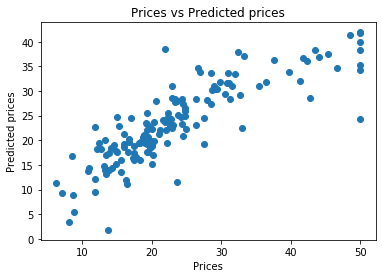

In [26]:
plt.scatter(y_test, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

# Desicion Tree Regressor

## Training the Model

In [27]:
from sklearn.tree import DecisionTreeRegressor   
DT_regressor = DecisionTreeRegressor(random_state = 0)  
DT_regressor.fit(X_train, y_train) 

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

## Predicting the Results 

In [28]:
y_pred_DTR = DT_regressor.predict(X_test)

In [29]:
y_pred_DTR

array([14.6, 22. , 20.9, 22.5, 44.8, 23.8, 36.2, 22.5, 17.2, 15.4, 23.9,
       18.4, 24.5, 24.3, 19.6, 14.1, 24.3, 12.8, 17.2, 14.8,  7. , 15.2,
       21.4, 18.4, 17.2, 19.6, 14. , 15. , 25. , 19.5, 13.3, 23.5, 36.5,
       20.3, 18.4, 12.3, 33.2, 44.8, 23.8, 23.4, 50. , 24.8,  9.6, 29.9,
       27.5, 20.9, 50. , 19.4, 21.4, 24. , 27.9, 25. , 11.3, 30.1, 17.4,
       19.3, 22. , 33.1, 21.8, 33.1, 17.4, 21.5, 35.1, 21.9, 50. , 30.1,
       21. ,  7.2, 17.7, 23. , 21.8, 24.3, 25.1, 30.1, 20.5, 36.1, 14.5,
       22. ,  8.3, 28.1, 20. , 15.6, 27.9, 25. , 25. , 21.2, 32.2, 19.6,
       22.5, 46. , 27.1, 50. , 19.4, 50. , 19.6, 16.2, 16.2, 27.5, 14.6,
       19. , 10.8, 24.3, 34.9, 14.5, 24.6, 18.2, 34.9, 32.9, 50. , 22. ,
       23.6, 22.7, 14.8, 37. , 33.4, 20.3, 50. , 15.4,  7. , 18.9, 21.2,
       11.5, 23.8, 16.5, 20. , 17.7, 50. , 13.3, 13.6,  8.3, 44.8, 17.4,
       50. , 27.1, 43.8, 18.8,  9.6, 24.1, 16.2, 23.1, 15.6, 13.1, 28.1,
       50. , 11.9, 19.5, 15.6, 15.4, 38.7, 18.9, 27

In [30]:
print('R^2:',metrics.r2_score(y_test, y_pred_DTR))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred_DTR))
print('Mean Squared Error:',metrics.mean_squared_error(y_test, y_pred_DTR))

R^2: 0.6666192239086298
Mean Absolute Error: 3.5046052631578952
Mean Squared Error: 34.81164473684211


## Visualising the predictions 

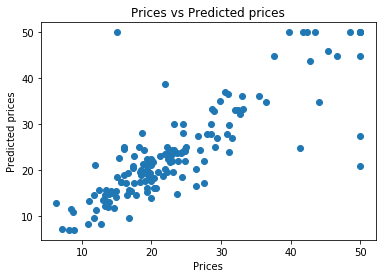

In [31]:
plt.scatter(y_test, y_pred_DTR)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()